### Importing Libraries

In [558]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing     import StandardScaler,MinMaxScaler
from sklearn.model_selection   import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model      import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics           import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

### Data Inspection


In [559]:
#Importing the dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [560]:
df.shape

(1460, 81)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [562]:
#To get 25th, 50th, 75th and 99th Percentile
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [563]:
#To find the columns which is having more null values 
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False).head(60)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageYrBlt      0.06
GarageFinish     0.06
GarageType       0.06
GarageQual       0.06
GarageCond       0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrType       0.01
MasVnrArea       0.01
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
LowQualFinSF     0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
GrLivArea        0.00
HeatingQC 

### Data Cleaning

In [564]:
#Drop the columns which is having more null values in the dataset
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis='columns')

In [565]:
#To convert the Year columns with the age
print("YearBuilt:", df.YearBuilt.max())
print("YearRemodAdd:", df.YearRemodAdd.max())
print("GarageYrBlt:", int(df.GarageYrBlt.max()))
print("YrSold:", df.YrSold.max())

YearBuilt: 2010
YearRemodAdd: 2010
GarageYrBlt: 2010
YrSold: 2010


In [567]:
df['YearBuilt_Old']    = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old']  = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old']       = df.YrSold.max()-df.YrSold

In [568]:
df[['YearBuilt','YearBuilt_Old','YearRemodAdd','YearRemodAdd_Old','GarageYrBlt','GarageYrBlt_Old','YrSold','YrSold_Old']].sample(10)

,YearBuilt,YearBuilt_Old,YearRemodAdd,YearRemodAdd_Old,GarageYrBlt,GarageYrBlt_Old,YrSold,YrSold_Old
1166,2008,2,2008,2,2008.0,2.0,2010,0
612,2001,9,2001,9,2001.0,9.0,2009,1
482,1915,95,2005,5,1915.0,95.0,2009,1
1010,1948,62,1950,60,1948.0,62.0,2008,2
785,1967,43,1967,43,1967.0,43.0,2009,1
1008,2004,6,2005,5,2004.0,6.0,2009,1
13,2006,4,2007,3,2006.0,4.0,2007,3
33,1959,51,1959,51,1959.0,51.0,2010,0
365,1920,90,1997,13,1964.0,46.0,2009,1
802,2005,5,2005,5,2005.0,5.0,2008,2


In [569]:
#Droping the columns YearBuilt, YearRemodAdd, GarageYrBlt and YrSold after conversion
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [290]:
#Droping the less significant columns
df = df.drop(['Street','Utilities','Id'],axis='columns')

In [291]:
#Fill Missing Values
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.00]

MasVnrType         0.01
MasVnrArea         0.01
BsmtQual           0.03
BsmtCond           0.03
BsmtExposure       0.03
BsmtFinType1       0.03
BsmtFinType2       0.03
GarageType         0.06
GarageFinish       0.06
GarageQual         0.06
GarageCond         0.06
GarageYrBlt_Old    0.06
dtype: float64

In [292]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt_Old.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

In [293]:
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False).head(60)

MSSubClass          0.0
MSZoning            0.0
GarageCars          0.0
GarageFinish        0.0
GarageType          0.0
Fireplaces          0.0
Functional          0.0
TotRmsAbvGrd        0.0
KitchenQual         0.0
KitchenAbvGr        0.0
BedroomAbvGr        0.0
HalfBath            0.0
FullBath            0.0
BsmtHalfBath        0.0
BsmtFullBath        0.0
GrLivArea           0.0
LowQualFinSF        0.0
GarageArea          0.0
GarageQual          0.0
GarageCond          0.0
MoSold              0.0
GarageYrBlt_Old     0.0
YearRemodAdd_Old    0.0
YearBuilt_Old       0.0
SalePrice           0.0
SaleCondition       0.0
SaleType            0.0
MiscVal             0.0
PavedDrive          0.0
PoolArea            0.0
ScreenPorch         0.0
3SsnPorch           0.0
EnclosedPorch       0.0
OpenPorchSF         0.0
WoodDeckSF          0.0
2ndFlrSF            0.0
1stFlrSF            0.0
Electrical          0.0
Condition2          0.0
RoofMatl            0.0
RoofStyle           0.0
OverallCond     

In [294]:
df[list(df.dtypes[df.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


### Data Visualisation

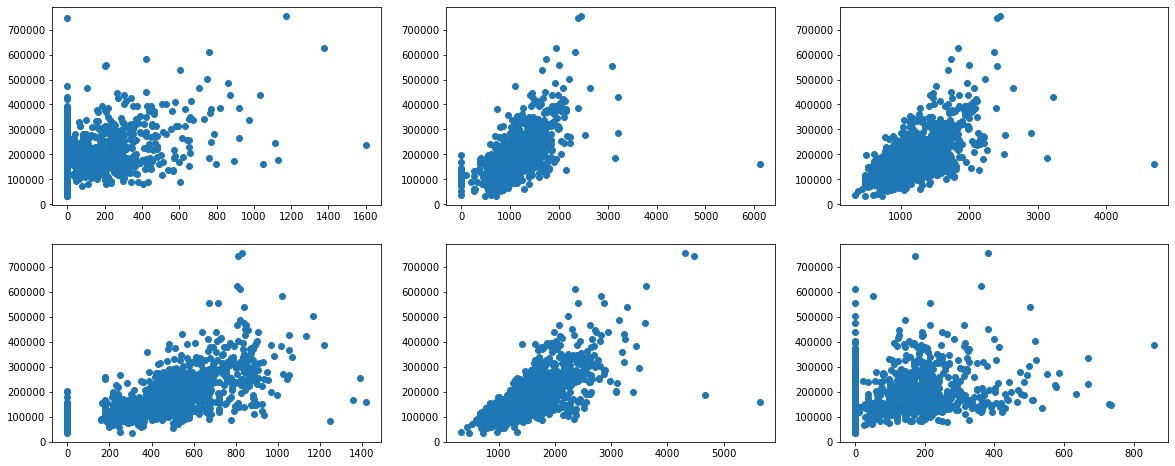

In [295]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

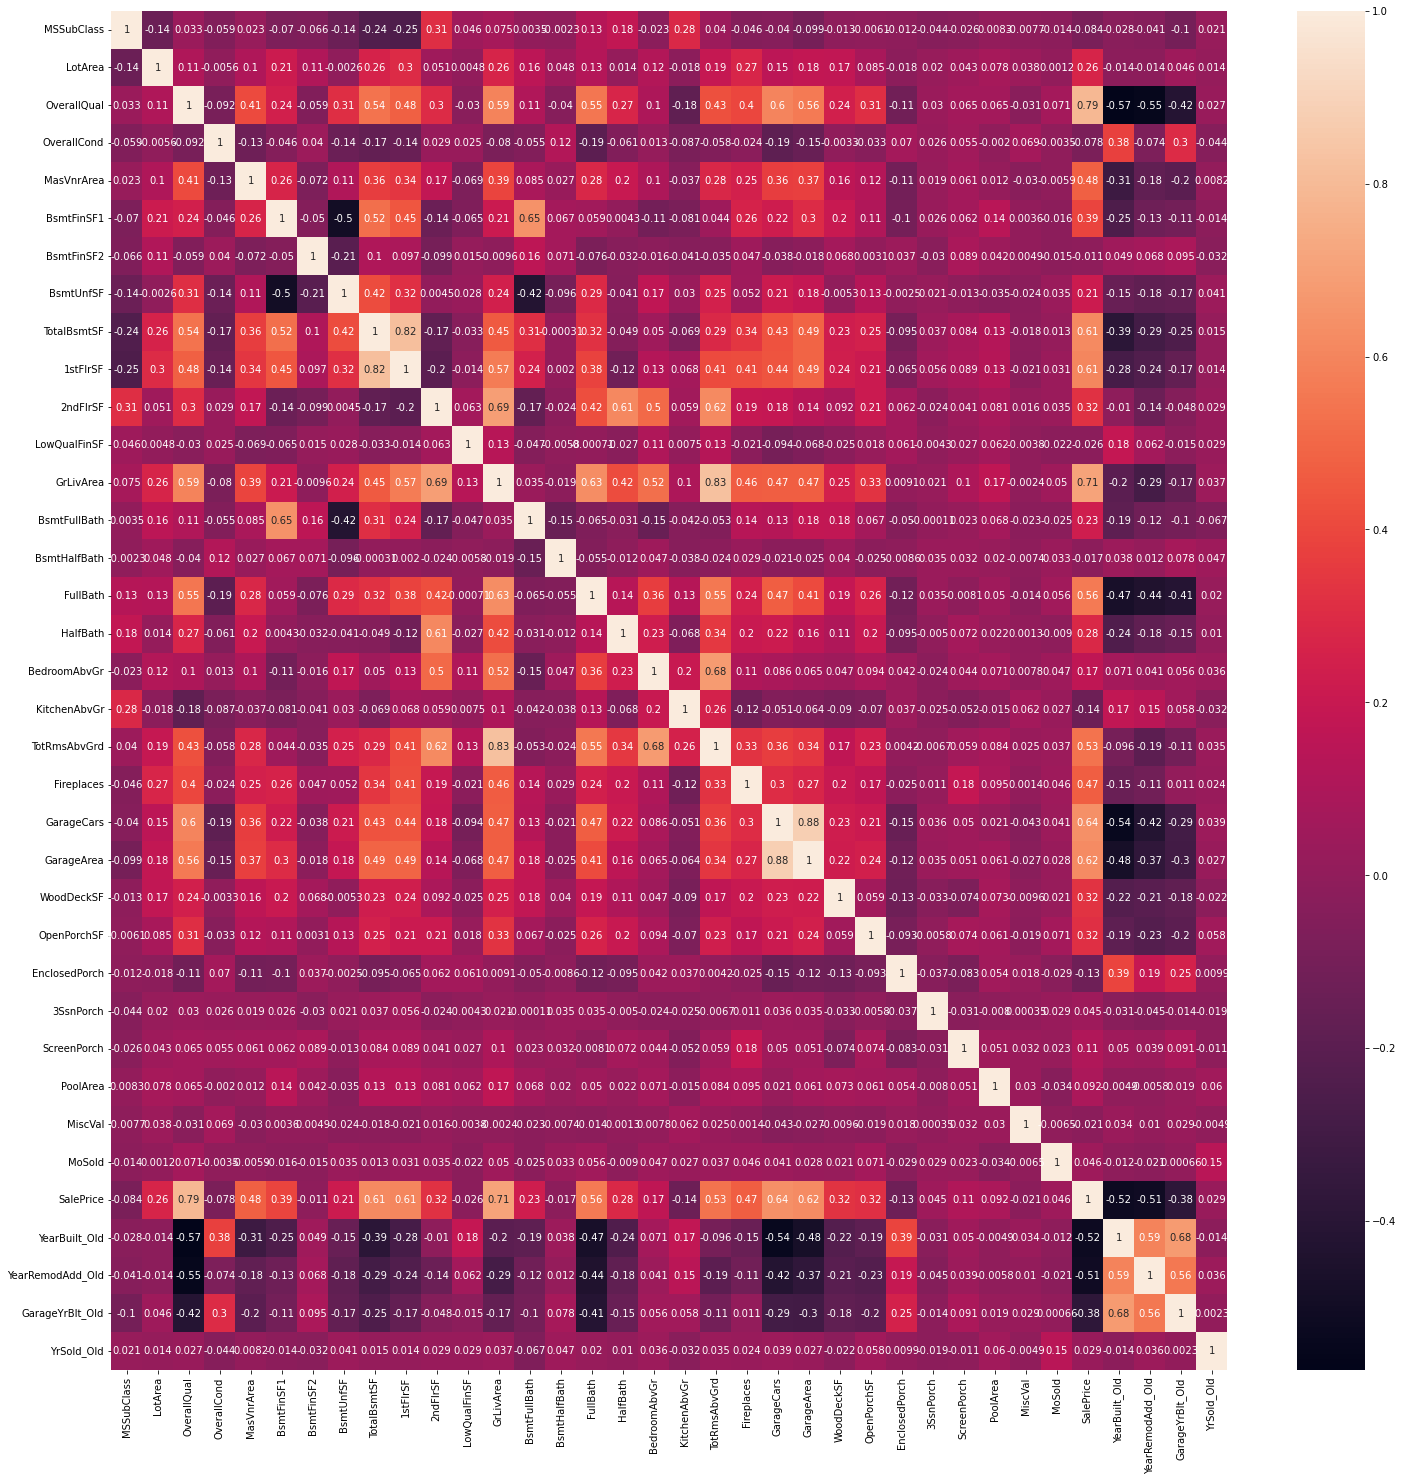

In [296]:
#To know the data correlation
plt.figure(figsize=(25,25))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [297]:
#Visualisation of columns having outliers
columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch', 'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']




In [298]:
columns = list(df.dtypes[df.dtypes !='object'].index)
columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch', 'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for column in columns:
        Q1 = x[column].quantile(.25)
        Q3 = x[column].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[column] >= (Q1-(1.5*IQR))) & (x[column] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

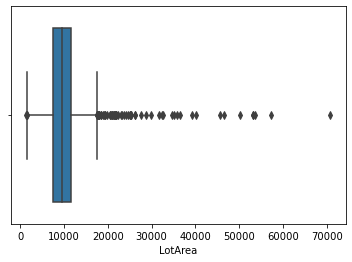

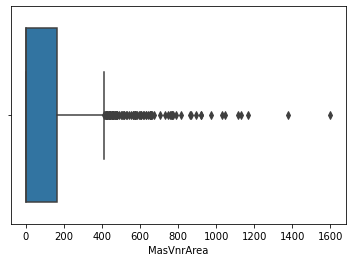

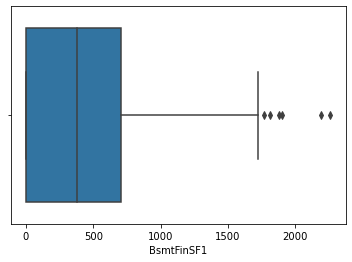

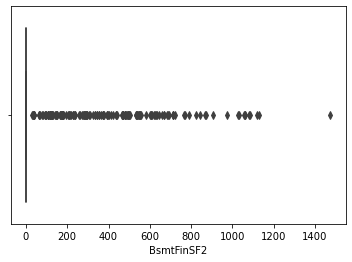

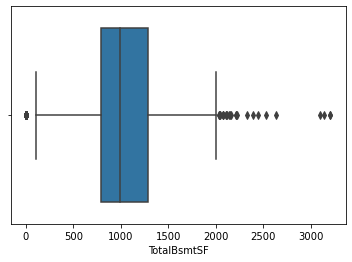

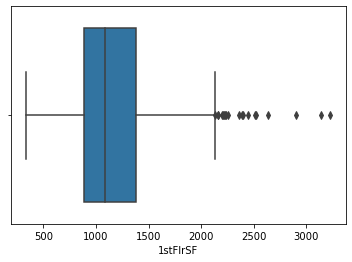

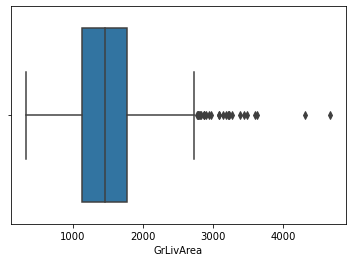

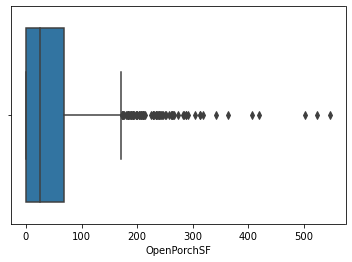

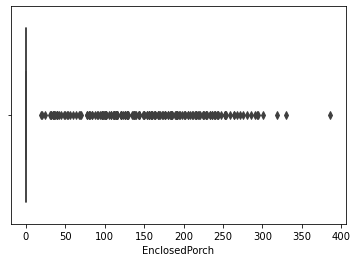

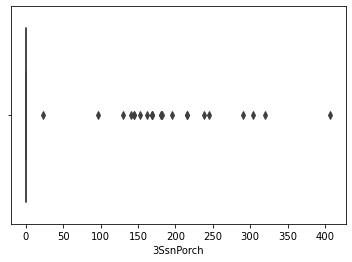

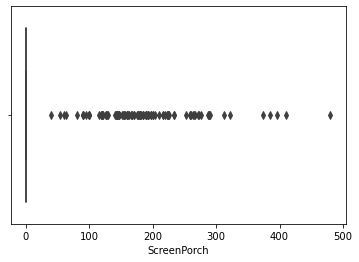

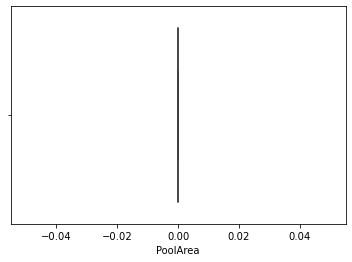

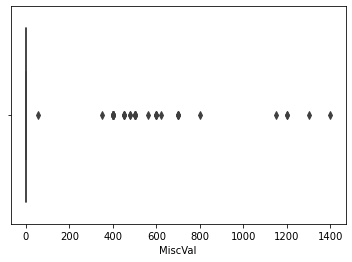

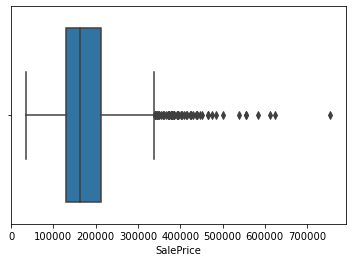

In [299]:
#Data Visualisation after eliminating outliers
columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch', 'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
for column in columns:
    sns.boxplot(df[column])
    plt.xlabel(column)
    plt.show()

In [300]:
df[list(df.dtypes[df.dtypes=='object'].index)].head(10)

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [301]:
#Map the Ordinal values with Numeric values
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [302]:
df[['LotShape','LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond']].head(10)

,LotShape,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond
0,3,0,3,4,3,1,6,1,4,1,3,2,3,3,2
1,3,0,2,4,3,4,5,1,4,1,2,2,3,3,2
2,0,0,3,4,3,2,6,1,4,1,3,2,3,3,2
3,0,0,2,3,4,1,5,1,3,1,3,1,3,3,2
4,0,0,3,4,3,3,6,1,4,1,3,2,3,3,2
5,0,0,2,4,3,1,6,1,4,1,2,1,3,3,2
6,3,0,3,5,3,3,6,1,4,1,3,2,3,3,2
7,0,0,2,4,3,2,5,4,4,1,2,2,3,3,2
8,3,0,2,3,3,1,1,1,3,1,2,1,2,3,2
9,3,0,2,3,3,1,6,1,4,1,2,2,4,3,2


In [303]:
#Create dummy variables and drop first column
columns = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
           'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
           'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummy_columns = pd.get_dummies(df[columns], drop_first=True)

df = pd.concat([df,dummy_columns],axis='columns')

df = df.drop(columns,axis='columns')

In [304]:
df.shape

(1441, 194)

### Train and Test Data Split

In [508]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [509]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(10)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0
5,0,2,4,3,1,6,1,4,1,2,1,3,3,2,0
6,0,3,5,3,3,6,1,4,1,3,2,3,3,2,3
7,0,2,4,3,2,5,4,4,1,2,2,3,3,2,0
8,0,2,3,3,1,1,1,3,1,2,1,2,3,2,3
9,0,2,3,3,1,6,1,4,1,2,2,4,3,2,3


In [510]:
#Scaling the required variables using StandardScaler
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

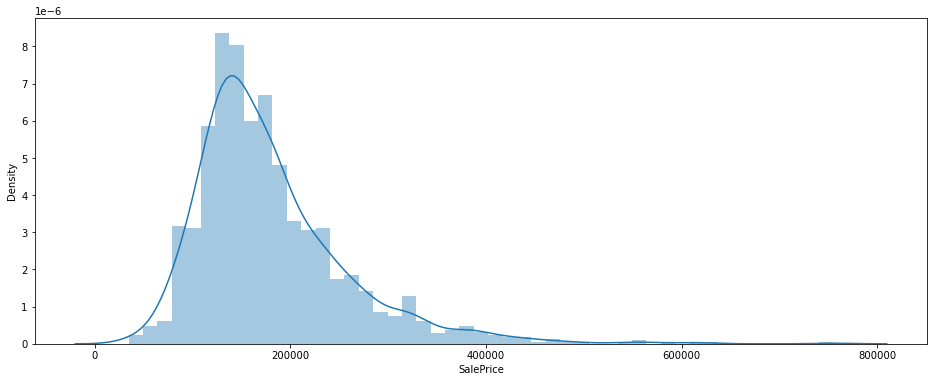

In [511]:
#Plotting the distribution on Original data
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

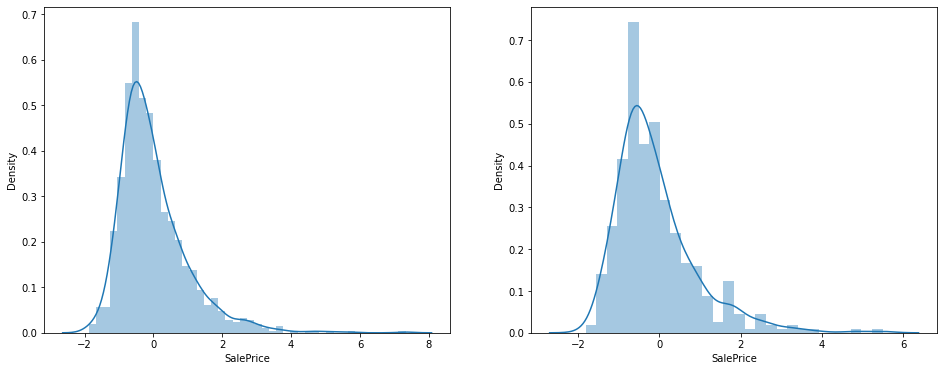

In [512]:
#Plotting the distribution on Train and Test data
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [513]:
#Splitting the dependent and independent variables on train and test set
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test  = df_test.pop('SalePrice')
X_test  = df_test

### Eliminating less significant columns based on RFE Rank

In [514]:
lm  = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [515]:
rfe = RFE(lm, step = 50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=50)

In [516]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotArea', False, 2),
 ('LotShape', False, 3),
 ('LandSlope', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 3),
 ('BsmtQual', False, 2),
 ('BsmtCond', False, 3),
 ('BsmtExposure', False, 2),
 ('BsmtFinType1', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 3),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 3),
 ('CentralAir', False, 2),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', False, 2),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 2),
 ('Fireplaces', False, 3),
 ('GarageFinish', False, 3),
 ('GarageCars', False, 3),
 ('GarageArea', False, 2),
 ('GarageQual', False, 2),
 ('Garag

In [517]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [518]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [519]:
rfe_sel_columns

['OverallQual',
 'MasVnrArea',
 'ExterQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'KitchenQual',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_CulDSac',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosN',
 'Condition2_RRAn',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Un

In [520]:
#Filter the train and test set based on RFE ranking
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Ridge Regression


In [521]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9019535948536368
0.8399395458340053


In [530]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [531]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
58,LotConfig_FR2,1.470016
28,BedroomAbvGr,0.366312
7,ExterQual,0.356722
40,EnclosedPorch,0.340249
54,LandContour_HLS,0.330903
94,Condition2_Norm,0.324818
11,BsmtExposure,0.257231
33,GarageFinish,0.245709
75,Neighborhood_NoRidge,0.210266
1,LotArea,0.203701


In [532]:
#To find the appropriate value of Hyperparameter(Lambda/Alpha)
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [533]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003597,0.000346,0.001988,0.000329,0.001,{'alpha': 0.001},0.828003,0.894652,0.774049,0.877945,...,0.909646,0.903619,0.901321,0.901907,0.900223,0.915611,0.903016,0.899839,0.904134,0.004680
1,0.002909,0.000456,0.001650,0.000368,0.010,{'alpha': 0.01},0.828683,0.894595,0.777074,0.877878,...,0.909639,0.903618,0.901319,0.901904,0.900221,0.915610,0.903014,0.899837,0.904132,0.004680
2,0.002536,0.000060,0.001478,0.000067,0.100,{'alpha': 0.1},0.833752,0.894023,0.800605,0.877264,...,0.909187,0.903481,0.901161,0.901685,0.900058,0.915537,0.902850,0.899691,0.903951,0.004668
3,0.002836,0.000430,0.001643,0.000369,0.200,{'alpha': 0.2},0.837276,0.893394,0.817880,0.876671,...,0.908325,0.903191,0.900833,0.901308,0.899716,0.915384,0.902508,0.899382,0.903589,0.004656
4,0.002536,0.000111,0.001432,0.000034,0.500,{'alpha': 0.5},0.842871,0.891575,0.845035,0.875221,...,0.905410,0.902032,0.899563,0.900040,0.898392,0.914772,0.901177,0.898152,0.902233,0.004685


In [534]:
#Evaluating best Lambda value
model_cv.best_params_

{'alpha': 1.0}

In [535]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.898504608583808
0.8513478952663436


In [537]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [538]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
58,LotConfig_FR2,1.514378
28,BedroomAbvGr,0.395725
7,ExterQual,0.332775
94,Condition2_Norm,0.237595
1,LotArea,0.225685
27,HalfBath,0.225004
60,LotConfig_Inside,0.212456
33,GarageFinish,0.201660
15,BsmtFinSF2,0.196734
8,ExterCond,0.163315


### Lasso Regression


In [539]:
#Lasso Regression model
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8930526548576574
0.8552361274488334


In [540]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -0.981),
 ('LotArea', 0.226),
 ('LotShape', 0.114),
 ('LandSlope', 0.137),
 ('OverallQual', 0.155),
 ('OverallCond', 0.081),
 ('MasVnrArea', -0.008),
 ('ExterQual', 0.333),
 ('ExterCond', 0.163),
 ('BsmtQual', 0.073),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.131),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.109),
 ('BsmtFinType2', -0.009),
 ('BsmtFinSF2', 0.197),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.0),
 ('CentralAir', -0.0),
 ('1stFlrSF', -0.065),
 ('2ndFlrSF', -0.223),
 ('LowQualFinSF', -0.041),
 ('GrLivArea', -0.101),
 ('BsmtFullBath', -0.143),
 ('BsmtHalfBath', -0.187),
 ('FullBath', -0.094),
 ('HalfBath', 0.225),
 ('BedroomAbvGr', 0.396),
 ('KitchenAbvGr', -0.181),
 ('KitchenQual', -0.199),
 ('TotRmsAbvGrd', -0.07),
 ('Fireplaces', -0.072),
 ('GarageFinish', 0.202),
 ('GarageCars', -0.0),
 ('GarageArea', 0.0),
 ('GarageQual', 0.1),
 ('GarageCond', -0.067),
 ('WoodDeckSF', 0.088),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.041),
 ('3SsnPorc

In [541]:
#To find the appropriate value of Hyperparameter(Lambda/Alpha)
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [542]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005769,0.001418,0.001905,0.000141,0.001,{'alpha': 0.001},0.841632,0.895155,0.816841,0.866446,...,0.900323,0.894932,0.891896,0.892851,0.890801,0.907614,0.893554,0.890522,0.895001,0.005016
1,0.004627,0.001818,0.001552,0.000200,0.010,{'alpha': 0.01},0.814719,0.858055,0.830839,0.825271,...,0.840655,0.839245,0.837270,0.837540,0.835286,0.871061,0.840189,0.833951,0.841585,0.010084
2,0.003078,0.000440,0.001621,0.000279,0.100,{'alpha': 0.1},0.741694,0.805251,0.769776,0.741077,...,0.780282,0.789278,0.783349,0.783012,0.776474,0.817421,0.783703,0.778584,0.786223,0.011038
3,0.002568,0.000159,0.001456,0.000026,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002591,0.000129,0.001583,0.000194,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [544]:
#Evaluating best Lambda value
model_cv.best_params_

{'alpha': 0.001}

In [546]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8930526548576574
0.8552361274488334


In [547]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [548]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
58,LotConfig_FR2,1.514378
28,BedroomAbvGr,0.395725
7,ExterQual,0.332775
94,Condition2_Norm,0.237595
1,LotArea,0.225685
27,HalfBath,0.225004
60,LotConfig_Inside,0.212456
33,GarageFinish,0.201660
15,BsmtFinSF2,0.196734
8,ExterCond,0.163315


### Model Analysis

#### Conclusion

Model was created both in Ridge and Lasso, we can see that the r2_scores are almost same for both of them but as Lasso will penalize more on the dataset and help us in feature selection with the least Alpha value.

In [556]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8930526548576574
0.8552361274488334


#### After compairing both the models, we can observe that the below Features influence the price of the houses. 
1)	LotConfig_FR2 </br>
2)	BedroomAbvGr</br>
3)	ExterQual</br>
4)	Condition2_Norm</br>
5)	LotArea</br>
6)	HalfBath</br>
7)	LotConfig_Inside</br>
8)	GarageFinish</br>
9)	BsmtFinSF2</br>
10)	ExterCond</br>



#### <font color =blue> Best alpha value for Lasso : {'alpha': 0.001}
#### <font color =blue>Best alpha value for Ridge : {'alpha': 1.0}